## Probability

This notebook is for Chapter 5 (Probability) of [Think Stats - Probability and Statistics for Programmers](http://greenteapress.com/thinkstats/) by Allen B Downey.

Objective: Introduction to probability.

__Frequentism__ - probability defined in terms of frequencies.

__Bayesianism__ - probability is the degree of belief that an event will occur.

### Rules of Probability

    P(A and B) = P(A).P(B), where A and B are independent.
    P(A|B) = P(A and B) / P(B), where A and B are not independent.


In [1]:
from __future__ import print_function, division
#from scipy.misc import comb
from scipy.special import comb
from scipy.stats import norm
import math
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

__Exercise 5.1:__ If I roll 2 dice and get 8, what is the chance that one of the dice is 6?

(2,6), (3,5), (4,4), (5,3), (6,2) are the only ways of getting an 8. Of these, there are 2 cases where 1 dice has a 6. Thus the answer is 2/5 = 0.4

__Exercise 5.2:__ If I roll 100 die, what is the chance of getting all sixes?

Chance of getting 6 on 1 die is 1/6. Since the dice throws are mutually independent events, it is (1/6)\*\*100, ie, 1.530646707486498e-78.

__Exercise 5.3 (a):__ If a family has 2 children, what is the chance that they will be both girls?

Family with 2 children can have one of (B,B), (B,G), (G,B), (G,G), so its 0.25.

__Exercise 5.3 (b):__ If a family has 2 children and we know at least one of them is a girl, what is the chance that they have 2 girls?

They can have (B,G) or (G,G), so its 0.5.

__Exercise 5.3 (c):__ If a family has 2 children and we know the older one is a girl, what is the chance they have 2 girls?

Same as above.

__Exercise 5.3 (d):__ If a family has 2 children and we know that at least one of them is a girl named Florida, what is the chance they have 2 girls?

Same as above.

#### Monty Hall

__Exercise 5.4:__ Write a program that simulates the Monty Hall problem and use it to estimate the probability if you stick or switch.

In [2]:
# Assume there are 3 door i.e 1 , 2 and 3

# let perform this trial for 1000 times 
nbr_games = 1000
nbr_wins_if_stick = 0
nbr_wins_if_switch = 0

# Scenerio 1:
door_with_prize = 1
first_guess = 1
# monty opens one of the "other" doors
doors_available = [2, 3]
door_opened = 2 # Monty can open either 2 or 3 . The probabilty of opening either of them is 0.5
second_guess = 3


if door_with_prize == first_guess:
    nbr_wins_if_stick += 1

if door_with_prize == second_guess:
    nbr_wins_if_switch += 1


# Scenerio 2:
door_with_prize = 2
first_guess = 1
# monty opens one of the "other" doors
doors_available = [2,3]
door_opened = 3 # Monty can open either 1 or 3 . The probabilty of opening either of them is 0.5
second_guess = 2


if door_with_prize == first_guess:
    nbr_wins_if_stick += 1

if door_with_prize == second_guess:
    nbr_wins_if_switch += 1


# Scenerio 3:
door_with_prize = 3
first_guess = 1
# monty opens one of the "other" doors
doors_available = [2,3]
door_opened = 2 # Monty can open either 2 or 3 . The probabilty of opening either of them is 0.5
second_guess = 3


if door_with_prize == first_guess:
    nbr_wins_if_stick += 1

if door_with_prize == second_guess:
    nbr_wins_if_switch += 1




print(nbr_wins_if_stick , nbr_wins_if_switch)


1 2


In [3]:
# door with the car behind it
door_with_prize = 0

# make first guess
first_guess = 1

# monty opens one of the "other" doors
doors_available = [x for x in [0, 1, 2] if x != door_with_prize
                                        and x != first_guess]
door_opened = doors_available[np.random.randint(len(doors_available))]
print(door_opened)
second_guess = [x for x in [0, 1, 2] if x != door_opened
                                     and x != first_guess][0]
second_guess

2


0

In [4]:
nbr_games = 100000
nbr_wins_if_stick = 0
nbr_wins_if_switch = 0
first_guress = 0
for i in range(nbr_games):
    # door with the car behind it
    door_with_prize = np.random.randint(3)  #-------------------> 0
    
    # make first guess
    first_guess = np.random.randint(3)      #-------------------> 1
    
    # monty opens one of the "other" doors
    doors_available = [x for x in [0, 1, 2] if x != door_with_prize
                                            and x != first_guess]
    door_opened = doors_available[np.random.randint(len(doors_available))]

    if door_with_prize == door_opened:
        first_guress += 1
        
    second_guess = [x for x in [0, 1, 2] if x != door_opened
                                         and x != first_guess][0]
    if door_with_prize == first_guess:
        nbr_wins_if_stick += 1
    if door_with_prize == second_guess:
        nbr_wins_if_switch += 1
print("Probability of winning if you stick: %.3f" % (nbr_wins_if_stick / nbr_games))
print("Probability of winning if you switch: %.3f" % (nbr_wins_if_switch / nbr_games))

Probability of winning if you stick: 0.337
Probability of winning if you switch: 0.663


In [5]:
first_guress

0

__Exercise 5.5:__ It is important to realize that by deciding which door to open, Monty is giving you information. Simulate the situation where this is not the case by making Monty open door B or C at random. If he opens the door with the car, the game is over and you cannot decide whether to stick or switch.

In [6]:
nbr_games = 1000
nbr_wins_if_stick = 0
nbr_wins_if_switch = 0
for i in range(nbr_games):
    # door with the car behind it
    door_with_prize = np.random.randint(3)
    # make first guess
    first_guess = np.random.randint(3)
    # monty opens one of the "other" doors
    doors_available = [x for x in [0, 1, 2] if x != first_guess]
    door_opened = doors_available[np.random.randint(len(doors_available))]
    if door_opened == door_with_prize:
        continue
    second_guess = [x for x in [0, 1, 2] if x != door_opened
                                         and x != first_guess][0]

    if door_with_prize == first_guess:
        nbr_wins_if_stick += 1
    if door_with_prize == second_guess:
        nbr_wins_if_switch += 1
print("Probability of winning if you stick: %.3f" % (nbr_wins_if_stick / nbr_games))
print("Probability of winning if you switch: %.3f" % (nbr_wins_if_switch / nbr_games))

Probability of winning if you stick: 0.316
Probability of winning if you switch: 0.343


#### Poincare

__Exercise 5.6:__ Write a program that simulates a baker who chooses n loaves from a distribution with mean 950g and standard deviation 50g and gives the heaviest one to Poincare. What value of n yields a distribution with mean 1000g? What is the standard deviation?

Compare this distribution to a normal distribution with the same mean and same standard deviation. Is the difference in the shape of the distribution big enough to convince the bread police?

In [90]:
np.random.randn(4)

array([-0.7192549 ,  1.20162407, -1.18437037, -1.61967663])

In [91]:
nbr_days = 20
n = 4
ploaf = np.zeros(nbr_days)
for day in range(nbr_days):
    loaf_wgts = 950 + 50 * np.random.randn(n)
    print(np.max(loaf_wgts))

1055.4877201869501
1013.5969991672337
1013.5677591791444
1006.3983726161097
1031.551464312037
987.3631219417758
1018.524813688279
1068.1545830425773
992.2006826130096
965.0813144109233
992.6672018562041
993.9996309008889
970.1239004644387
997.5839300553163
951.4385958323322
1031.5472661016304
935.8708669446249
1025.7963341375173
1001.9619481195763
1001.8255896524906


Poincare's loaves: mean = 1001.380, sd = 33.691


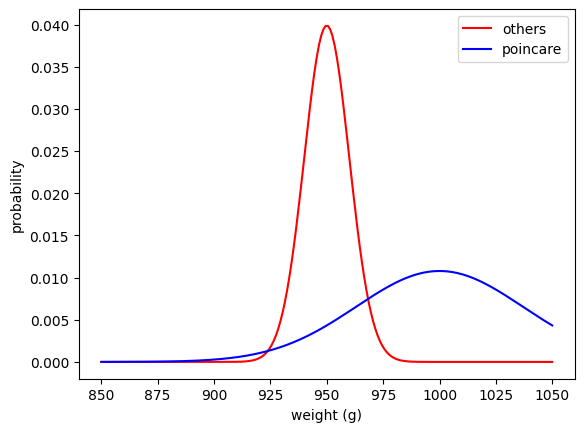

In [95]:
nbr_days = 365
n = 4
ploaf = np.zeros(nbr_days)
for day in range(nbr_days):
    loaf_wgts = 950 + 50 * np.random.randn(n)
    ploaf[day] = np.max(loaf_wgts)
print("Poincare's loaves: mean = %.3f, sd = %.3f" % (np.mean(ploaf), np.std(ploaf)))

xs = np.linspace(950-100, 950+100, 200)
loaf_ys = norm.pdf(xs, 950, 10)
#ploaf_ys = norm.pdf(xs, 1000, 34)
ploaf_ys = norm.pdf(xs, 1000, 37)
plt.plot(xs, loaf_ys, color="red", label="others")
plt.plot(xs, ploaf_ys, color="blue", label="poincare")
plt.xlabel("weight (g)")
plt.ylabel("probability")
plt.legend(loc="best")

__Exercise 5.7:__ If you go to a dance where partners are paired up randomly, what percentage of opposite sex couples will you see where the woman is taller than the man? Distribution of heights is roughly normal with mean of 178 and SD 59.4 for men and 163 and 52.8 for women.

In [7]:
nbr_obs = 1000
nbr_woman_taller = 0
men_heights = np.random.normal(loc=178, scale=59.4, size=nbr_obs)
women_heights = np.random.normal(loc=163, scale=52.8, size=nbr_obs)
for i in range(nbr_obs):
    nbr_woman_taller += 1 if women_heights[i] > men_heights[i] else 0
print("Probability of woman being taller: %.3f" % (nbr_woman_taller / nbr_obs))

Probability of woman being taller: 0.420


### Mutually Exclusive Events

    P(A|B) = P(B|A) = 0
    P(A or B) = P(A) + P(B)              if A and B are mutually exclusive
    P(A or B) = P(A) + P(B) - P(A and B) in general

__Exercise 5.8:__ If I roll 2 dice, what is the chance of rolling at least one six?

Rolling at least 1 six = First dice roll 6 + Second dice roll 6 + Both dice roll 6 = (1/6)+(1/6)+(1/36) = 0.36.

__Exercise 5.9:__ What is the general formula for probability of A or B but not both?

    P(A or B) = P(A) + P(B) - P(A and B)
    

### Binomial Distribution

Chance of getting exactly k successes from n trials, given p is the probability of success.

$$PMF(k) = \binom{n}{k}p^{k}(1-p)^{n-k}$$

$$\binom{n}{k} = \frac{n!}{k!(n-k)!}$$

__Exercise 5.10:__ If you flip a coin 100 times, you expect about 50 heads, but what is the probability of getting exactly 50 heads?

In [101]:
p = comb(100, 50) * math.pow(0.5, 50) * math.pow(0.5, 50)
print("probability of exactly 50 heads in 100 tosses: %.3f" % (p))

probability of exactly 50 heads in 100 tosses: 0.080


### Streaks and hot spots

__Example 5.11:__ If there are 10 players in a basketball game and each one takes 15 shots during the course of the game, and each shot has a 50% probability of going in, what is the probability that you will see, in a given game, at least 1 player who hits 10 shots in a row? If you watch a season of 82 games, what are the chances of seeing at least one string of 10 hits or misses?

In [105]:
def step(x, t):
    return 1 if x > t else 0

nbr_sims = 1000
nbr_players = 10
nbr_succ = 0
for g in range(nbr_sims):
    nbr_streaks = 0
    for p in range(nbr_players):
        #nbr_streaks = 0
        shots = [step(x, 0.5) for x in np.random.random(15).tolist()]
        for i in range(len(shots)-10):
            window = shots[i:i+10]
            if sum(window) == 10:
                nbr_streaks += 1
    # we saw at least 1 streak (or not) in this game
    nbr_succ += 1 if nbr_streaks > 0 else 0
print("chance of seeing at least 1 streak per game: %.3f" % (nbr_succ / nbr_sims))

nbr_games = 82
nbr_succ = 0
for s in range(nbr_sims):
    nbr_streaks = 0
    for g in range(nbr_games):
        #nbr_streaks = 0
        for p in range(nbr_players):
            shots = [step(x, 0.5) for x in np.random.random(15).tolist()]
            for i in range(len(shots)-10):
                window = shots[i:i+10]
                if sum(window) == 10 or sum(window) == 0:
                    nbr_streaks += 1
    nbr_succ += 1 if nbr_streaks > 0 else 0
print("chance of seeing at least 1 streak per season: %.3f" % (nbr_succ / nbr_sims))

chance of seeing at least 1 streak per game: 0.040
chance of seeing at least 1 streak per season: 0.993


__Exercise 5.12:__ In 1941 Joe DiMaggio got at least 1 hit in 56 consecutive games. Use Monte Carlo simulation to estimate the probability that any player in major league baseball will have a hitting streak of 57 or more games in the next century.

In [106]:
nbr_sims = 1000
nbr_years = 100 # next century
nbr_games_per_season = 162 # from wikipedia
nbr_succ = 0
for sim in range(nbr_sims):
    nbr_streaks = 0
    for i in range(nbr_years):
        #nbr_streaks = 0
        hits = [step(x, 0.5) for x in np.random.random(nbr_games_per_season).tolist()]
        for j in range(len(hits)-57):
            window = hits[j:j+57]
            if sum(window) == 57:
                nbr_streaks += 1
    if nbr_streaks > 0:
        nbr_succ += 1
print("chance of another hitting streak: %.7f" % (nbr_succ / nbr_sims))

chance of another hitting streak: 0.0000000


__Exercise 5.13:__ Suppose that a particular cancer has an incidence of 1 case per thousand people per year. If you follow a particular cohort of 100 people for 10 years, you would expect to see about 1 case. If you saw two cases, that would not be very surprising, but more than than two would be rare. Write a program that simulates a large number of cohorts over a 10 year period and estimates the distribution of total cases.

An observation is considered statistically significant if its probability by chance alone, called a p-value, is less than 5%. In a cohort of 100 people over 10 years, how many cases would you have to see to meet this criterion?

Now imagine that you divide a population of 10000 people into 100 cohorts and follow them for 10 years. What is the chance that at least one of the cohorts will have a “statistically significant” cluster? What if we require a p-value of 1%?

Now imagine that you arrange 10000 people in a 100x100 grid and follow them for 10 years. What is the chance that there will be at least one 10x10 block anywhere in the grid with a statistically significant cluster?

Finally, imagine that you follow a grid of 10000 people for 30 years. What is the chance that there will be a 10-year interval at some point with a 10x10 block anywhere in the grid with a statistically significant cluster?

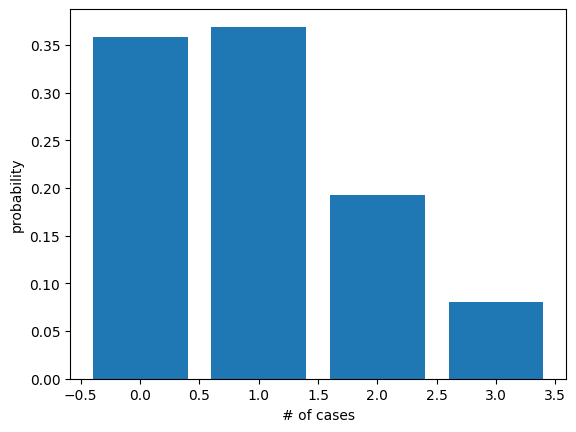

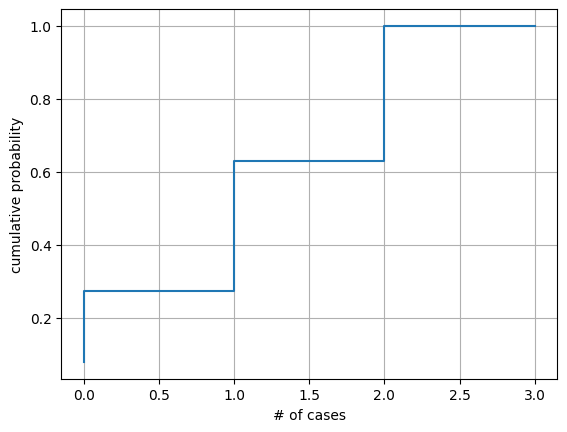

In [108]:
p = 0.001 # one case per 1000 per year
nbr_cohorts = 1000
nbr_years = 10
cohort_size = 100
nbr_cases_dist = []
for c in range(nbr_cohorts):
    nbr_cases = 0
    for y in range(nbr_years):
        for i in range(cohort_size):
            d = np.random.random()
            if d < p:
                nbr_cases += 1
    nbr_cases_dist.append(nbr_cases)
nbr_case_dist = np.array(nbr_cases_dist)
range_lb = np.min(nbr_case_dist)
range_ub = np.max(nbr_case_dist)
nbr_bins = range_ub - range_lb

# compute PMF
pmf = np.histogram(np.array(nbr_cases_dist), bins=nbr_bins, range=(range_lb, range_ub),
                   density=True)
plt.bar(pmf[1][:-1], pmf[0])
plt.xlabel("# of cases")
plt.ylabel("probability")
plt.show()

# compute CDF
ps = np.cumsum(np.sort(pmf[0]))
xs = pmf[1][:-1]
plt.step(xs, ps)
plt.xlabel("# of cases")
plt.ylabel("cumulative probability")
plt.grid(True)
plt.show()

Statistically significant at p-value of 5% means the # of cases at cumulative probability of 0.95, ie 5 cases. For statistical significance at p-value of 1% means the number of cases at cumulative probability 0.99, also 5 cases.

Other cases are just about rearranging the loops so not doing them.

### Bayes Theorem

$$P(A|B) = \frac{P(B|A)P(A)}{P(B)}$$

Here P(A) is the __prior__, P(A|B) is the __posterior__, P(B|A) is the __likelihood__, and P(B) is the __normalizing constant__.

__Exercise 5.14:__ Write a program that takes the actual rate of drug use, and the sensitivity and specificity of the test, and computes P(drug use|positive test).

Suppose the same test is applied to a population where the actual rate of drug use is 1%. What is the probability that someone who tests positive is actually a drug user?

In [109]:
def compute_drug_use_given_positive_test(p_drug_use,    # p(drug use)
                                        sensitivity,    # p(positive result | drug use)
                                        specificity):   # p(negative result | -drug use)
    norm = (p_drug_use * sensitivity) + ((1 - p_drug_use)*(1 - specificity))
    return (p_drug_use * sensitivity) / norm

print(compute_drug_use_given_positive_test(0.05, 0.6, 0.99))
print(compute_drug_use_given_positive_test(0.01, 0.6, 0.99))

0.7594936708860758
0.3773584905660375


Discussions for solutions to the exercises below can be found on Allen Downey's [blog post](http://allendowney.blogspot.com/2011/10/all-your-bayes-are-belong-to-us.html).

__Exercise 5.15:__ Suppose there are two full bowls of cookies. Bowl 1 has 10 chocolate chip and 30 plain cookies, while Bowl 2 has 20 of each. Fred picks a bowl at random, and then picks a cookie at random. The cookie turns out to be a plain one. How probable is it that Fred picked it out of Bowl 1?

In [11]:
p_bowl1 = 0.5
p_bowl2 = 0.5
p_plain_given_bowl1 = 30 / (10 + 30)
p_plain_given_bowl2 = 20 / (20 + 20)
p_bowl1_given_plain = p_plain_given_bowl1 * p_bowl1
p_bowl1_given_plain /= (p_plain_given_bowl1 * p_bowl1) + (p_plain_given_bowl2 * p_bowl2)
print(p_bowl1_given_plain)

0.6


__Exercise 5.16:__ The blue M&M was introduced in 1995. Before then, the color mix in a bag of plain M&Ms was (30% Brown, 20% Yellow, 20% Red, 10% Green, 10% Orange, 10% Tan). Afterward it was (24% Blue , 20% Green, 16% Orange, 14% Yellow, 13% Red, 13% Brown).

A friend has two bags of M&Ms, and he tells me that one is from 1994 and one from 1996. He won’t tell me which is which, but he gives me one M&M from each bag. One is yellow and one is green. What is the probability that the yellow M&M came from the 1994 bag?

In [110]:
# h1 = bag 1 is from 1994 and bag 2 is from 1996
# h2 = bag 1 is from 1996 and bag 2 is from 1994
# e = yellow and green M&M
p_h1 = 0.5
p_h2 = 0.5
p_e_given_h1 = 0.2 * 0.2  # P(y from 1994 bag) * P(g from 1996 bag)
p_e_given_h2 = 0.1 * 0.14 # P(y from 1996 bag) * P(g from 1994 bag)
p_h1_given_e = p_e_given_h1 * p_h1
p_h1_given_e /= ((p_e_given_h1 * p_h1) + (p_e_given_h2 * p_h2))
print(p_h1_given_e)

0.7407407407407408


__Exercise 5.17:__ Elvis Presley had a twin brother who died at birth. According to the
Wikipedia article on twins - Twins are estimated to be approximately 1.9% of the world population, with monozygotic twins making up 0.2% of the total and 8% of all twins. What is the probability that Elvis was an identical twin?

In [111]:
# h1 = elvis had identical twin
# h2 = elvis had fraternal twin
# e = brother was male
p_h1 = 0.08
p_h2 = 1 - p_h1
p_e_given_h1 = 1.0     # identical twins have same sex
p_e_given_h2 = 0.5     # fraternal twins can have either sex
p_h1_given_e = p_e_given_h1 * p_h1
p_h1_given_e /= ((p_e_given_h1 * p_h1) + (p_e_given_h2 * p_h2))
print(p_h1_given_e)

0.14814814814814814
